In [1]:

from convertions import mp3_to_signal, signal_to_spectro, spectro_to_image
from convertions import image_to_spectro, spectro_to_signal, signal_to_mp3
from convertions import signal_batch_maker, signal_batch_joiner
from plots import plot_audio_signal, plot_spectrogram

import os
import numpy as np


In [2]:
spectro_folder = "data/spectro/"
mp3_folder = "data/audio/"

audio_file_path = mp3_folder + "Punk Jazz Revisited.mp3"
batch_duration = 120 # seconds
image_size = 1024 # pixels

## Convert audio file to spectrogram and save it to spectro_file_path

mp3_to_signal()
  - Checking input parameters...
  - Loading audio file...
## end mp3_to_signal()


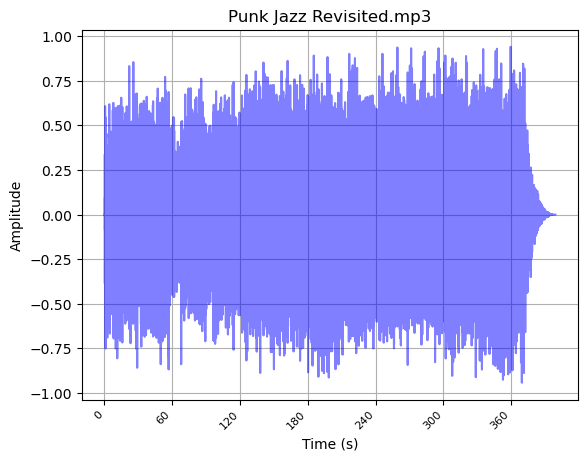

In [3]:
# Load audio file
audio_signal, sr = mp3_to_signal(audio_file_path, display=True)

plot_audio_signal(audio_signal, sr, title=audio_file_path.split("/")[-1])

In [4]:
# Split audio signal into batches of duration
batch_size = int(sr * batch_duration)
audio_signal_batches = signal_batch_maker(audio_signal, batch_size, display=display)

signal_batch_maker()
  - Checking input parameters...
  - Splitting audio signal into batches...
## end signal_batch_maker()


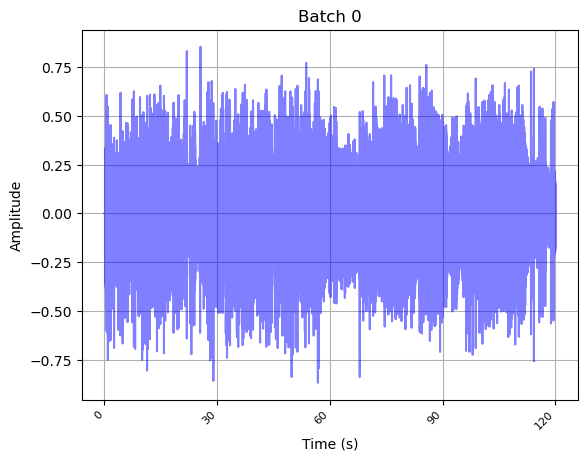

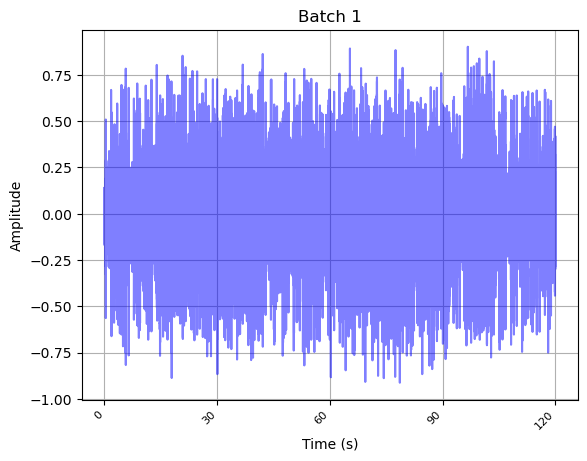

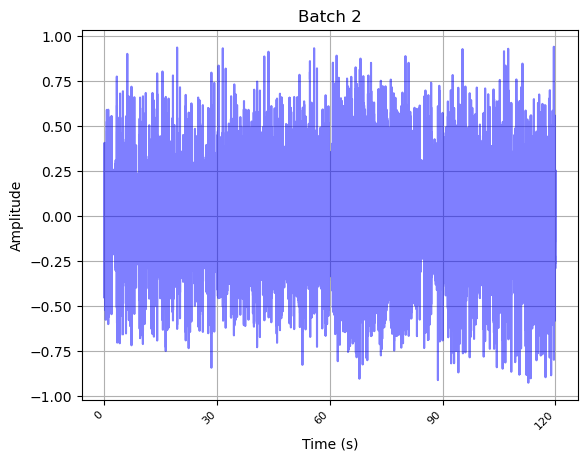

In [5]:
for i, audio_signal_batch in enumerate(audio_signal_batches):
    plot_audio_signal(audio_signal_batch, sr, title="Batch {}".format(i))

In [6]:
# create folder for spectrograms
spectro_dir_path = spectro_folder + audio_file_path.split("/")[-1].split(".")[0] + "/"
if not os.path.exists(spectro_dir_path):
    os.makedirs(spectro_dir_path)

In [7]:
# get the n_fft and hop_length parameters
# we want the spectrogram to be square, dim = (image_size, image_size)
# We can know in advance the size of the spectrogram with n_fft and hop_length
# the spectrogram size is ( n_fft/2 + 1, audio_signal.shape[0] / hop_length + 1 )
n_fft = int(image_size * 2 - 2)
hop_length = int((batch_size / image_size) + 1)

print(" - Parameters:")
print("      Audio signal shape:", audio_signal.shape)
print("      Sampling rate     :", sr)
print("      Batch size        :", batch_size)
print("      n_fft             :", n_fft)
print("      hop_length        :", hop_length)

 - Parameters:
      Audio signal shape: (17603712,)
      Sampling rate     : 44100
      Batch size        : 5292000
      n_fft             : 2046
      hop_length        : 5168


In [8]:
D_before = signal_to_spectro(audio_signal_batches[0], n_fft=n_fft, hop_length=hop_length, display=True)

print(D_before.shape)

signal_to_spectro()
  - Checking input parameters...
  - Converting audio to spectrogram...
  - Converting spectrogram to decibels...
## end signal_to_spectro()
(1024, 1024)


In [9]:
min_spectro_db = []
max_spectro_db = []

for i, audio_signal_batch in enumerate(audio_signal_batches):    
    # Convert audio to spectrogram
    D = signal_to_spectro(audio_signal_batch, n_fft, hop_length, display=display)
    
    assert D.shape[0] == image_size and D.shape[1] == image_size, "Spectrogram shape must be (image_size, image_size) = ({}, {}) but is {}".format(image_size, image_size, D.shape)
    if display: print("  - Spectrogram shape:", D.shape)
    
    min_spectro_db.append(D.min())
    max_spectro_db.append(D.max())
    
    # Convert spectrogram to image
    spectro_file_path = spectro_dir_path + str(i) + ".png"
    
    spectro_to_image(D, spectro_file_path, display=True, image_size=image_size)

if display: print("## end mp3_to_image()")    

signal_to_spectro()
  - Checking input parameters...
  - Converting audio to spectrogram...
  - Converting spectrogram to decibels...
## end signal_to_spectro()
  - Spectrogram shape: (1024, 1024)
spectro_to_image()
  - Rescaling spectrogram (0 - 255)...
  - Cropping spectrogram...
  - Saving spectrogram...
## end spectro_to_image()
signal_to_spectro()
  - Checking input parameters...
  - Converting audio to spectrogram...
  - Converting spectrogram to decibels...
## end signal_to_spectro()
  - Spectrogram shape: (1024, 1024)
spectro_to_image()
  - Rescaling spectrogram (0 - 255)...
  - Cropping spectrogram...
  - Saving spectrogram...
## end spectro_to_image()
signal_to_spectro()
  - Checking input parameters...
  - Converting audio to spectrogram...
  - Converting spectrogram to decibels...
## end signal_to_spectro()
  - Spectrogram shape: (1024, 1024)
spectro_to_image()
  - Rescaling spectrogram (0 - 255)...
  - Cropping spectrogram...
  - Saving spectrogram...
## end spectro_to_ima

## Convert spectrogram to audio file and save it to audio_file_path

In [10]:
spectro_file_path = spectro_dir_path + "0.png"

spectro_size = (batch_duration * sr)

D = image_to_spectro(spectro_file_path, min_spectro_db=min_spectro_db[0], max_spectro_db=max_spectro_db[0], display=True)

# compare D_before and D
print("D_before")
print("  Shape", D_before.shape)
print("  Type", type(D_before))
print("  dtype", D_before.dtype)
print("  min", np.min(D_before))
print("  max", np.max(D_before))
print("  mean", np.mean(D_before))
print("  std", np.std(D_before))

print("D")
print("  Shape", D.shape)
print("  Type", type(D))
print("  dtype", D.dtype)
print("  min", np.min(D))
print("  max", np.max(D))
print("  mean", np.mean(D))
print("  std", np.std(D))



mse = np.mean((D_before - D)**2)
print("mse", mse)

image_to_spectro()
  - Checking input parameters...
  - Loading spectrogram image...
  - Spectrogram image shape: (1024, 1024)
  - Converting spectrogram image to numpy array...
    - Spectrogram shape: (1024, 1024)
## end image_to_spectro()
D_before
  Shape (1024, 1024)
  Type <class 'numpy.ndarray'>
  dtype float32
  min -35.648033
  max 44.351967
  mean -23.595053
  std 15.000109
D
  Shape (1024, 1024)
  Type <class 'numpy.ndarray'>
  dtype float32
  min -35.648033
  max 44.351967
  mean -23.679806
  std 14.94239
mse 0.017709306


spectro_to_signal()
  - Checking input parameters...
  - Converting spectrogram to audio...
  - Rescaling audio signal (-1, 1)...
## end spectro_to_signal()


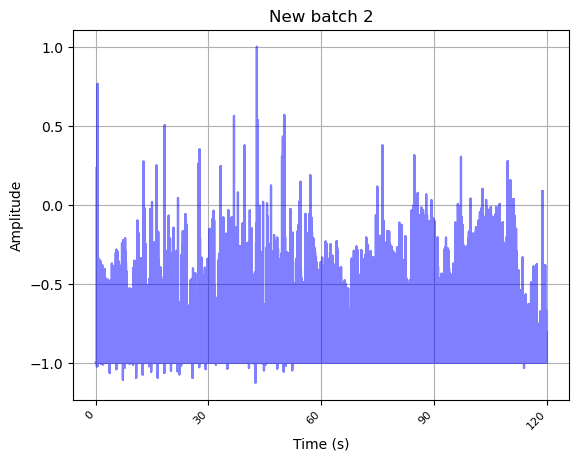

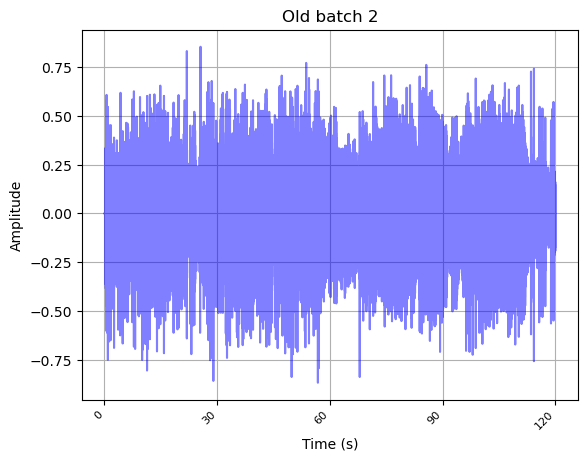

In [11]:
audio_signal_batch = spectro_to_signal(D, n_fft, hop_length, display=True)

plot_audio_signal(audio_signal_batch, sr, title="New batch {}".format(i))
plot_audio_signal(audio_signal_batches[0], sr, title="Old batch {}".format(i))

In [18]:
# count the number of 0 values in the new audio signal
print("Number of 0 values in the new audio signal:", np.sum(audio_signal_batch == 0))
print("Number of non 0 values in the new audio signal:", np.sum(audio_signal_batch != 0))

print("ratio", np.sum(audio_signal_batch == 0) / np.sum(audio_signal_batch != 0))


# for old signal

# count the number of 0 values in the new audio signal
print("Number of 0 values in the old audio signal:", np.sum(audio_signal_batches[0] == 0))
print("Number of non 0 values in the old audio signal:", np.sum(audio_signal_batches[0] != 0))

print("ratio", np.sum(audio_signal_batches[0] == 0) / np.sum(audio_signal_batches[0] != 0))

Number of 0 values in the new audio signal: 3856756
Number of non 0 values in the new audio signal: 1430108
ratio 2.696828491274785


In [ ]:
# get each audio signal from spectrograms
audio_signal_batches = []

for i, spectro_file_name in enumerate(os.listdir(spectro_dir_path)):
    print("  - File:", spectro_file_name)
    # Load spectrogram
    spectro_file_path = spectro_dir_path + spectro_file_name
    spectro_size = (batch_duration * sr) 
    D = image_to_spectro(spectro_file_path, display=display, spectro_size=spectro_size)
    
    assert D.shape[0] == image_size and D.shape[1] == image_size, "Spectrogram shape must be (image_size, image_size) = ({}, {}) but is {}".format(image_size, image_size, D.shape)
    
    print("    - Spectrogram shape:", D.shape)
    
    # Convert spectrogram to audio
    audio_signal_batch = spectro_to_signal(D, n_fft, hop_length, display=display)
    
    # resize audio signal batch
    audio_signal_batch = np.resize(audio_signal_batch, batch_size)
    
    assert audio_signal_batch.shape[0] == batch_size, "Audio signal batch shape must be ({},) but is {}".format(batch_size, audio_signal_batch.shape)
    
    print("    - Audio signal shape:", audio_signal_batch.shape)
    
    audio_signal_batches.append(audio_signal_batch)

In [ ]:
# Join audio signal batches
audio_signal_batches = np.array(audio_signal_batches)
audio_signal = signal_batch_joiner(audio_signal_batches, display=display)
if display: print("  - Audio signal shape:", audio_signal.shape)

# Save audio signal to mp3 file
signal_to_mp3(audio_signal, sr, audio_file_path, display=display)

In [ ]:
# import os
# from convertions import mp3_to_image

# # for each mp3 file in the audio folder get the spectrogram and save it as a png file

# spectro_folder = "data/spectro/"
# mp3_folder = "data/audio/"

# for file in os.listdir(mp3_folder):
#     if file.endswith(".mp3"):
#         print(file)
#         mp3_to_image(mp3_folder + file, spectro_folder, display=False)